LIMPIEZA Y NORMALIZACIÓN DE DATOS

In [1446]:
import pandas as pd
import numpy as np
import seaborn as sns

In [1447]:
data = pd.read_csv("finca_raiz_medellin.csv")

In [1448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   descripcion      1197 non-null   object 
 1   habitaciones     1068 non-null   float64
 2   banios           1066 non-null   float64
 3   parqueaderos     794 non-null    float64
 4   area_construida  1068 non-null   object 
 5   area_privada     1068 non-null   object 
 6   estrato          1069 non-null   float64
 7   estado           482 non-null    object 
 8   antiguedad       784 non-null    object 
 9   piso             704 non-null    object 
 10  administeracion  1068 non-null   object 
 11  precio_m2        1068 non-null   object 
 12  barrio           1197 non-null   object 
dtypes: float64(4), object(9)
memory usage: 121.7+ KB


In [1449]:
data.head()

,descripcion,habitaciones,banios,parqueaderos,area_construida,area_privada,estrato,estado,antiguedad,piso,administeracion,precio_m2,barrio
0,Apartamento en venta en unidad cerrada cerca a...,3.0,4.0,NaN,260 m²,260 m²,6.0,NaN,NaN,NaN,No definida,"$ 6.153.846,15*m²",El Campestre - Medellín - Antioquia
1,Moderno y elegante apartamento en la Loma de l...,2.0,1.0,1.0,51 m²,51 m²,5.0,Excelente,1 a 8 años,Otro,$ 218.000 COP,"$ 6.176.470,59*m²",Loma de los bernal - Medellín - Antioquia
2,¡Apartamentos de136 m2 cada uno! LOS APARTAMEN...,8.0,9.0,NaN,136 m²,136 m²,3.0,NaN,NaN,3,No definida,"$ 5.514.705,88*m²",La América - Medellín - Antioquia
3,Apartamento muy acogedor en la Urbanización ce...,3.0,2.0,NaN,47 m²,47 m²,3.0,NaN,9 a 15 años,NaN,$ 130.000 COP,"$ 4.042.553,19*m²",Buenos Aires - Medellín - Antioquia
4,VENDO APARTAMENTO LAURELES - PEDIDO 449 MILLON...,3.0,2.0,1.0,95 m²,0 m²,6.0,NaN,NaN,6,$ 425.000 COP,"$ 4.726.315,79*m²",Laureles - Medellín - Antioquia


In [1450]:
# Vemos a modo general las estadisticas de los datos que tenmos
data.describe()

,habitaciones,banios,parqueaderos,estrato
count,1068.000000,1066.000000,794.000000,1069.000000
mean,2.914794,2.549719,1.497481,4.730589
std,0.771594,1.134961,0.729918,1.099204
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,4.000000
50%,3.000000,2.000000,1.000000,5.000000
75%,3.000000,3.000000,2.000000,6.000000
max,8.000000,9.000000,6.000000,6.000000


In [1451]:
cols_to_fill = ['estado_conserv', 'antiguedad', 'piso']

In [1452]:
# Se rellenan las columnas seleccionadas con 'sin dato' , ya que , son categoricas y se necesitan para el modelo
value_to_fill = 'sin dato'

In [1453]:
for col in cols_to_fill:
    if col in data.columns:
        data[col] = data[col].fillna(value_to_fill)

In [1454]:
cols_to_fill = ['habitaciones', 'banios', 'parqueaderos', 'estrato']

In [1455]:
# Se rellenan los valores nulos con la mediana para no afectar el modelo de predicción
for col in cols_to_fill:
    if col in data.columns:
        data[col].fillna(data[col].median(),inplace=True)
        data[col] = data[col].astype(int)

In [1456]:
data.head()

,descripcion,habitaciones,banios,parqueaderos,area_construida,area_privada,estrato,estado,antiguedad,piso,administeracion,precio_m2,barrio
0,Apartamento en venta en unidad cerrada cerca a...,3,4,1,260 m²,260 m²,6,NaN,sin dato,sin dato,No definida,"$ 6.153.846,15*m²",El Campestre - Medellín - Antioquia
1,Moderno y elegante apartamento en la Loma de l...,2,1,1,51 m²,51 m²,5,Excelente,1 a 8 años,Otro,$ 218.000 COP,"$ 6.176.470,59*m²",Loma de los bernal - Medellín - Antioquia
2,¡Apartamentos de136 m2 cada uno! LOS APARTAMEN...,8,9,1,136 m²,136 m²,3,NaN,sin dato,3,No definida,"$ 5.514.705,88*m²",La América - Medellín - Antioquia
3,Apartamento muy acogedor en la Urbanización ce...,3,2,1,47 m²,47 m²,3,NaN,9 a 15 años,sin dato,$ 130.000 COP,"$ 4.042.553,19*m²",Buenos Aires - Medellín - Antioquia
4,VENDO APARTAMENTO LAURELES - PEDIDO 449 MILLON...,3,2,1,95 m²,0 m²,6,NaN,sin dato,6,$ 425.000 COP,"$ 4.726.315,79*m²",Laureles - Medellín - Antioquia


In [1457]:
cols_to_rename = {'banios': 'baños', 'area_construida': 'area_const_m2', 'area_privada': 'area_privada_m2', 'estado': 'estado_conserv', 'administeracion': 'administracion_pesos'}

In [1458]:
data = data.rename(columns=cols_to_rename)

In [1459]:
cols_to_convert = ['area_const_m2', 'area_privada_m2']

In [1460]:
for col in cols_to_convert:
    if col in data.columns:
        data[col] = data[col].str.replace(' m²','')
        data[col] = data[col].str.replace(",",".")
        data[col] = data[col].astype(float)

In [1461]:
# Se limpia el dato de la columna barrio quitandole la ciudad y el departamento
data['barrio'] = data['barrio'].str.split('-').str[0].str.strip()

In [1462]:
data['precio_m2'] = (data['precio_m2']
                      .str.replace('$','')
                      .str.replace('m²','')
                      .str.replace('*','')
                      .str.strip()
                      .str.replace(".","")
                      .str.replace(",",".")
                      .astype(float))

C:\Users\Campuzano\AppData\Local\Temp\ipykernel_3032\557829486.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('$','')
C:\Users\Campuzano\AppData\Local\Temp\ipykernel_3032\557829486.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('*','')
C:\Users\Campuzano\AppData\Local\Temp\ipykernel_3032\557829486.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace(".","")


In [1463]:
# Se limpia el dato administración
data['administracion_pesos'] = (data['administracion_pesos']
                      .str.replace('$','')
                      .str.replace('COP','')
                      .str.strip()
                      .str.replace(".","")
                      .astype(str))

C:\Users\Campuzano\AppData\Local\Temp\ipykernel_3032\3904467096.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('$','')
C:\Users\Campuzano\AppData\Local\Temp\ipykernel_3032\3904467096.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace(".","")


In [1464]:
cols_to_fill = ["administracion_pesos"]
value_to_replace = 'No definida'
for col in cols_to_fill:
    if col in data.columns:
        data[col].replace(value_to_replace, np.nan, inplace=True)
        data[col] = data[col].str.replace("$", "").str.replace("COP", "").str.replace(".", "").astype(float)
        data[col].fillna(data[col].median(), inplace=True)


C:\Users\Campuzano\AppData\Local\Temp\ipykernel_3032\4080337195.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].str.replace("$", "").str.replace("COP", "").str.replace(".", "").astype(float)


In [1465]:
col = data['piso']
col = pd.to_numeric(col, errors='coerce')
col = col.fillna(col.median())
data['piso'] = col

In [1466]:
# Se eliminan los nulos de área construida
data = data.dropna(subset=["area_const_m2"])

In [1467]:
data['precio_total'] = data['area_const_m2'].multiply(data['precio_m2'])

In [1468]:
# Quitamos la columna precio * m2 y la columna descripción para poder trabajar mas adelante el modelo de predicción
data = data.drop('precio_m2', axis=1)
data = data.drop('descripcion', axis=1)
data = data.drop('area_privada_m2', axis=1)

In [1469]:
data.head()

,habitaciones,baños,parqueaderos,area_const_m2,estrato,estado_conserv,antiguedad,piso,administracion_pesos,barrio,precio_total
0,3,4,1,260.0,6,NaN,sin dato,4.0,300000.0,El Campestre,1.600000e+09
1,2,1,1,51.0,5,Excelente,1 a 8 años,4.0,218000.0,Loma de los bernal,3.150000e+08
2,8,9,1,136.0,3,NaN,sin dato,3.0,300000.0,La América,7.500000e+08
3,3,2,1,47.0,3,NaN,9 a 15 años,4.0,130000.0,Buenos Aires,1.900000e+08
4,3,2,1,95.0,6,NaN,sin dato,6.0,425000.0,Laureles,4.490000e+08


In [1470]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1068
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   habitaciones          1068 non-null   int32  
 1   baños                 1068 non-null   int32  
 2   parqueaderos          1068 non-null   int32  
 3   area_const_m2         1068 non-null   float64
 4   estrato               1068 non-null   int32  
 5   estado_conserv        481 non-null    object 
 6   antiguedad            1068 non-null   object 
 7   piso                  1068 non-null   float64
 8   administracion_pesos  1068 non-null   float64
 9   barrio                1068 non-null   object 
 10  precio_total          1068 non-null   float64
dtypes: float64(4), int32(4), object(3)
memory usage: 83.4+ KB


ANALSIS EXPLORATORIO CON DATA LIMPIA

C:\Users\Campuzano\AppData\Local\Temp\ipykernel_3032\3795444791.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

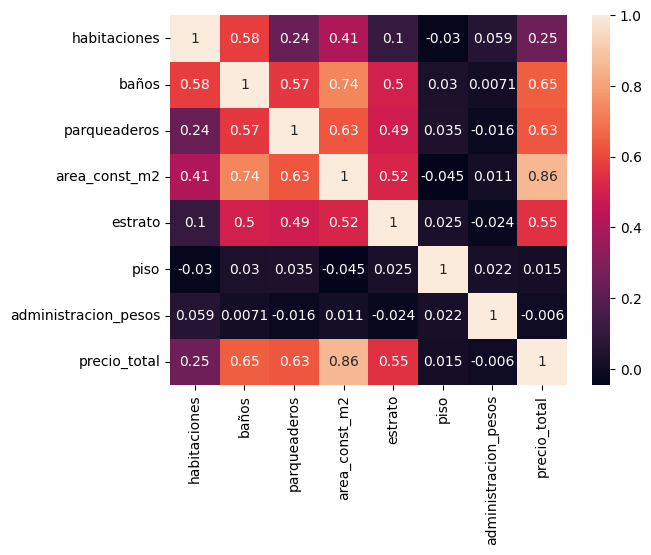

In [1471]:
# Visualizamos las correlaciones entre las variables que nos pueden servr para desarrollar el modelo
corr = data.corr()
sns.heatmap(corr, annot=True)

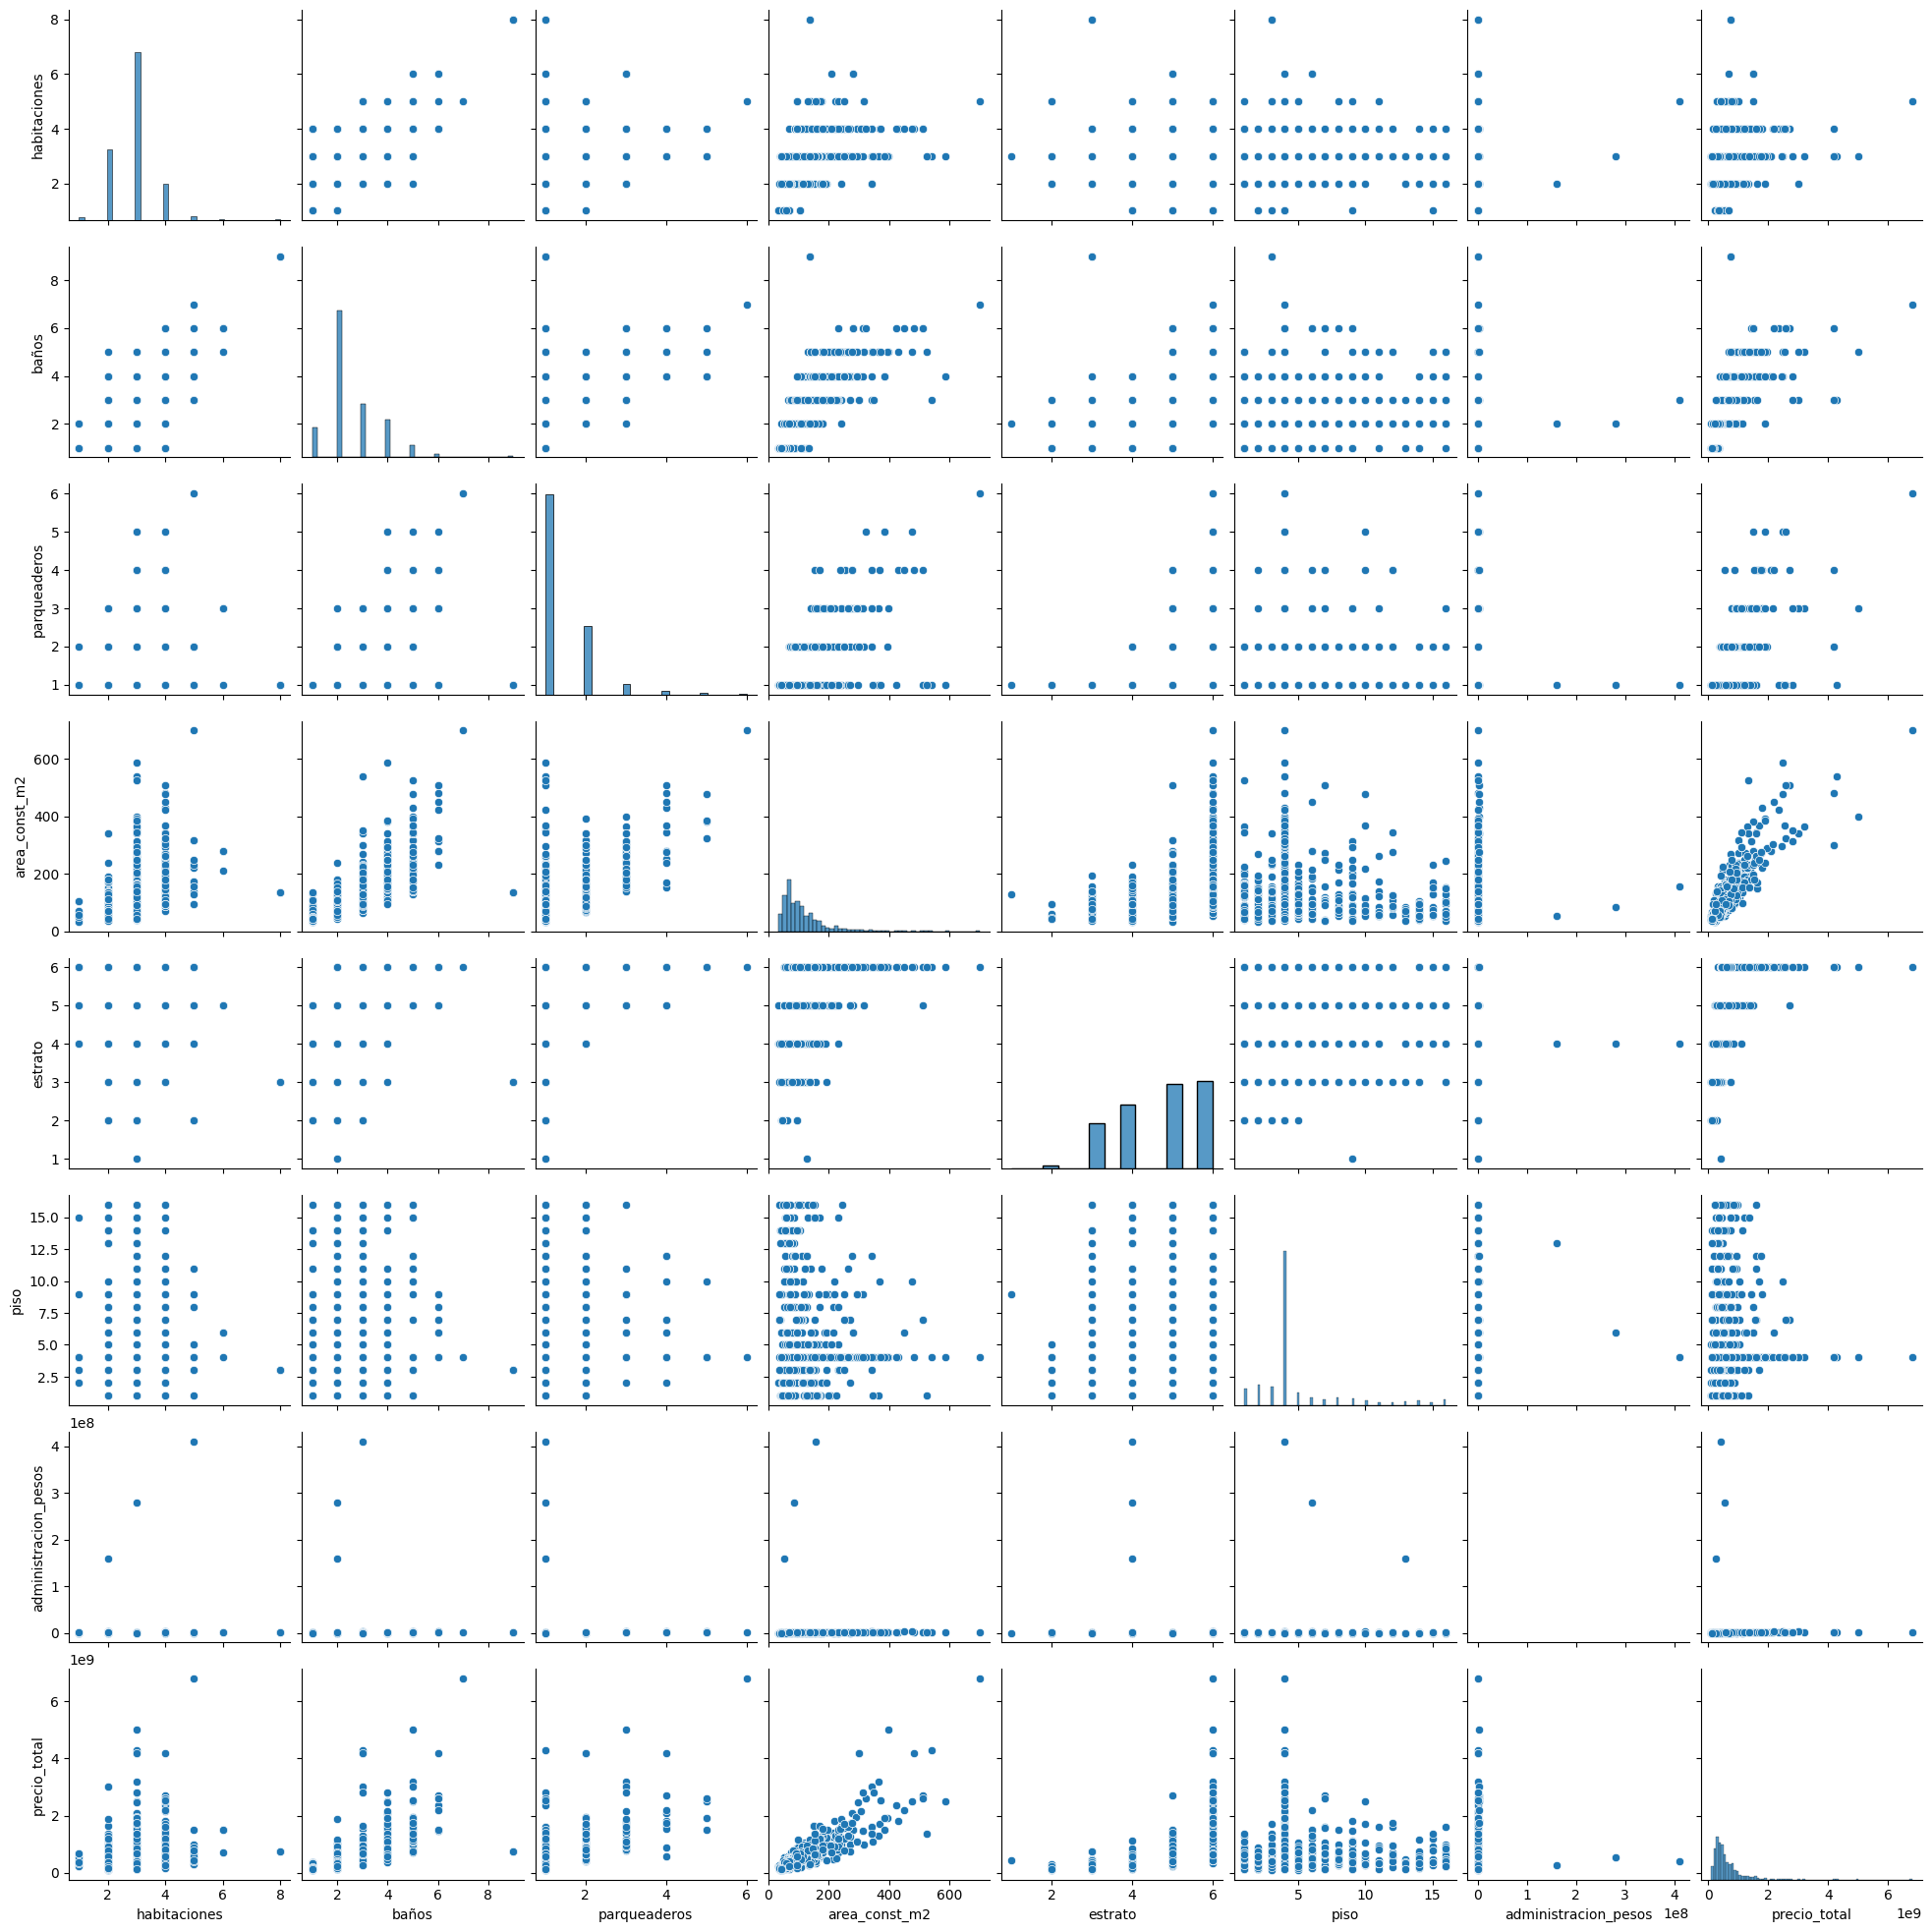

In [1472]:
sns.pairplot(data)

C:\Users\Campuzano\AppData\Local\Temp\ipykernel_3032\3194983216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['habitaciones'],hist=True)


<AxesSubplot: xlabel='habitaciones', ylabel='Density'>

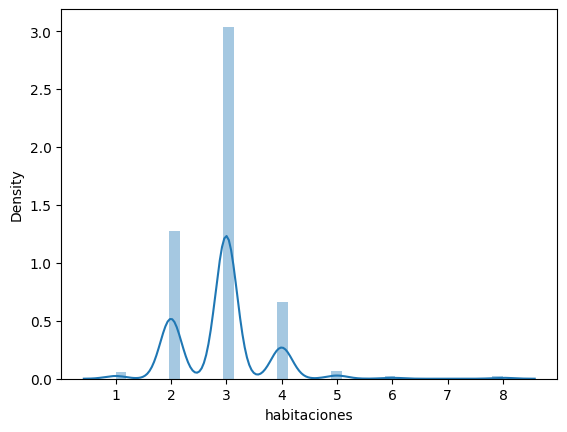

In [1473]:
sns.distplot(data['habitaciones'],hist=True)

C:\Users\Campuzano\AppData\Local\Temp\ipykernel_3032\2626733801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['baños'],hist=True)


<AxesSubplot: xlabel='baños', ylabel='Density'>

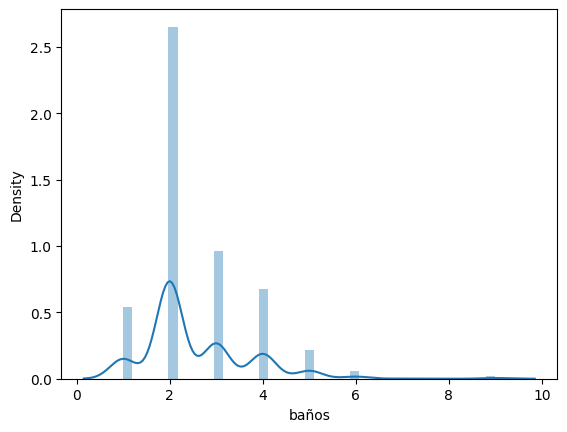

In [1538]:
sns.distplot(data['baños'],hist=True)

In [1475]:
# Se organiza la data de barrios con coincidencias 
data['barrio'] = data['barrio'].str.replace(r'(?i)laureles', 'Laureles')
data['barrio'] = data['barrio'].str.replace(r'^.*(Laureles).*$', 'Laureles')

C:\Users\Campuzano\AppData\Local\Temp\ipykernel_3032\872671586.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['barrio'] = data['barrio'].str.replace(r'(?i)laureles', 'Laureles')
C:\Users\Campuzano\AppData\Local\Temp\ipykernel_3032\872671586.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['barrio'] = data['barrio'].str.replace(r'^.*(Laureles).*$', 'Laureles')


In [1476]:
value_counts = data['piso'].value_counts()
print(value_counts)

4.0     582
2.0      80
3.0      72
1.0      62
5.0      50
8.0      32
6.0      31
9.0      26
7.0      23
16.0     21
14.0     20
10.0     19
13.0     14
11.0     13
15.0     12
12.0     11
Name: piso, dtype: int64


In [1477]:
data.head()

,habitaciones,baños,parqueaderos,area_const_m2,estrato,estado_conserv,antiguedad,piso,administracion_pesos,barrio,precio_total
0,3,4,1,260.0,6,NaN,sin dato,4.0,300000.0,El Campestre,1.600000e+09
1,2,1,1,51.0,5,Excelente,1 a 8 años,4.0,218000.0,Loma de los bernal,3.150000e+08
2,8,9,1,136.0,3,NaN,sin dato,3.0,300000.0,La América,7.500000e+08
3,3,2,1,47.0,3,NaN,9 a 15 años,4.0,130000.0,Buenos Aires,1.900000e+08
4,3,2,1,95.0,6,NaN,sin dato,6.0,425000.0,Laureles,4.490000e+08


In [1478]:
# Se hace un one-hot-encode para poder evaluar las variables categoricas dentro del modelo
data = pd.get_dummies(data, columns=['estado_conserv','antiguedad','barrio','piso'])

In [1479]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1068
Columns: 250 entries, habitaciones to piso_16.0
dtypes: float64(3), int32(4), uint8(243)
memory usage: 303.5 KB


In [1480]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [1505]:
# Se seleccionan los datos que se van a usar para implementar el modelo
X = data[["habitaciones", "baños", "parqueaderos", "area_const_m2", "estrato"]]
y = data["precio_total"]

In [1506]:
# Se dividen los datos en pruebas y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1507]:
# Se usa primero una regresión lineal , ya que, deseamos hallar un valor numerico
lr = LinearRegression()

In [1508]:
# Entrenamos el modelo
lr.fit(X_train, y_train)

LinearRegression()

In [1509]:
# Realizamos la predicción
y_pred = lr.predict(X_test)

In [1514]:
# obtenemos las metricas de error cuadratico y r2 para medir el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = lr.score(X_test, y_test)

In [1515]:
print("Error cuadrático medio: ", mse)
print("R²:", r2)

Error cuadrático medio:  6.604426039344458e+16
R²: 0.790650644360941


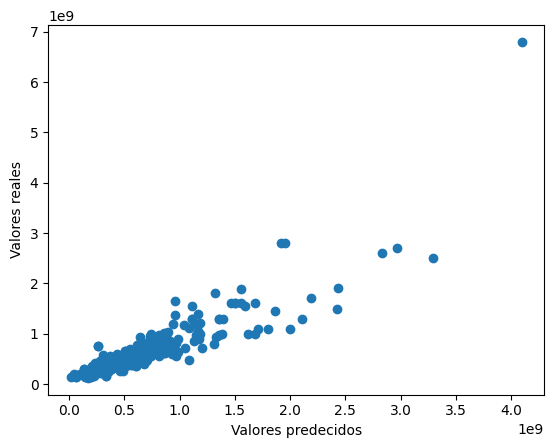

In [1516]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test)
plt.xlabel('Valores predecidos')
plt.ylabel('Valores reales')
plt.show()

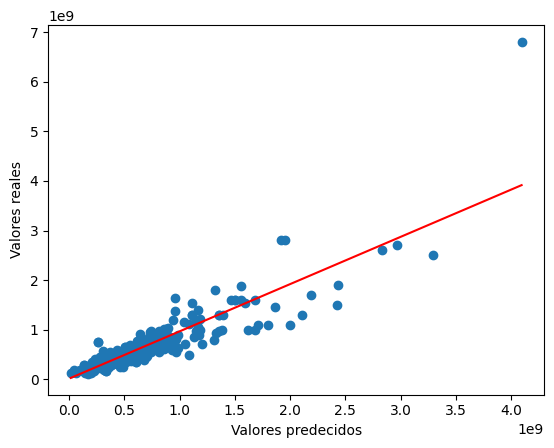

In [1517]:
import numpy as np

# Agregar una línea de regresión
plt.scatter(y_pred, y_test)
plt.xlabel('Valores predecidos')
plt.ylabel('Valores reales')
plt.plot(np.unique(y_pred), np.poly1d(np.polyfit(y_pred, y_test, 1))(np.unique(y_pred)),color="r")
plt.show()

In [1518]:
from sklearn.ensemble import RandomForestRegressor

In [1519]:
# Usamos Random Forest ,ya que, combina varios árboles de decisión entrenados con subconjuntos diferentes
rf = RandomForestRegressor()

In [1520]:
#Entrenamos el modelo
rf.fit(X_train, y_train)

RandomForestRegressor()

In [1521]:
# Realizamos la predicción
y_pred = rf.predict(X_test)

In [1524]:
# Medimos el r2 y el error cuadratico para medir el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = rf.score(X_test, y_test)

In [1525]:
print("Error cuadrático medio: ", mse)
print("R²:", r2)

Error cuadrático medio:  8.0797450311975e+16
R²: 0.7438854783243241


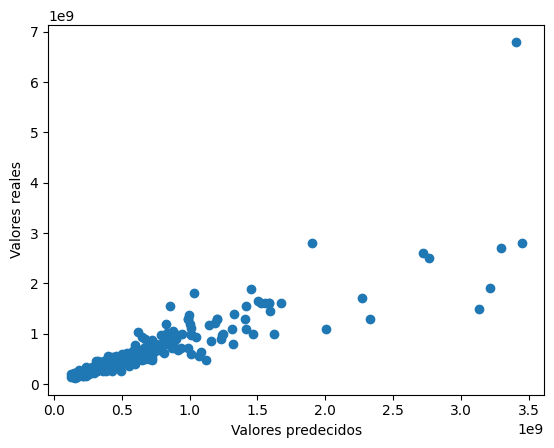

In [1526]:
plt.scatter(y_pred, y_test)
plt.xlabel('Valores predecidos')
plt.ylabel('Valores reales')
plt.show()

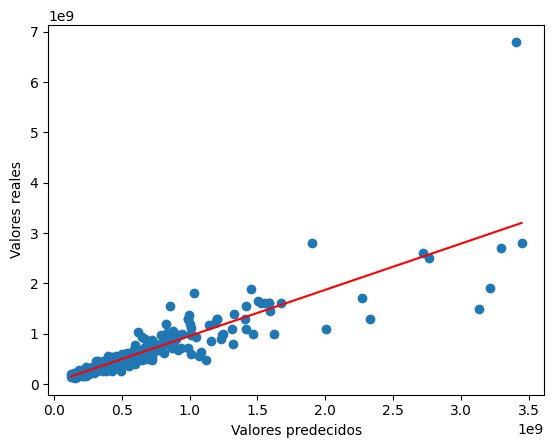

In [1527]:
plt.scatter(y_pred, y_test)
plt.xlabel('Valores predecidos')
plt.ylabel('Valores reales')
plt.plot(np.unique(y_pred), np.poly1d(np.polyfit(y_pred, y_test, 1))(np.unique(y_pred)),color="r")
plt.show()

In [1536]:
def predecir_precio(habitaciones,baños,parqueaderos,area_const_m2,estrato):
    X_new = [[habitaciones,baños,parqueaderos,area_const_m2,estrato]]
    y_new_pred = lr.predict(X_new)
    precio = "${:,.2f}".format(y_new_pred[0])
    print("Predicción: ", precio + ' '+'pesos')

In [1537]:
# predecimos como ejemplo un apartamento con 2 habitaciones,1 baño,1 parqueadero,100 mt2 y estrato 5
predecir_precio(2,1,1,100,5)

Predicción:  $581,310,703.65 pesos


c:\Users\Campuzano\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
